In [2]:
import numpy as np  # Importa a biblioteca NumPy, usada para cálculos numéricos e manipulação de arrays

# Função para gerar dados artificiais agrupados (clusters)
def createClusteredData(N, k):
    np.random.seed(1234)  # Define a semente

    pointsPerCluster = float(N) / k  # Calcula quantos pontos haverá por cluster (N = total de pontos, k = número de grupos)
    X = []
    y = []

    for i in range(k):
        # Define aleatoriamente o centro de renda e idade desse cluster
        incomeCentroid = np.random.uniform(20000.0, 200000.0)  # renda entre 20 mil e 200 mil
        ageCentroid = np.random.uniform(20.0, 70.0)            # idade entre 20 e 70 anos

        for j in range(int(pointsPerCluster)):  #
            # Cria um ponto com distribuição normal em torno do centro
            X.append([
                np.random.normal(incomeCentroid, 10000.0),  # Renda com desvio padrão de 10 mil
                np.random.normal(ageCentroid, 2.0)          # Idade com desvio padrão de 2
            ])
            y.append(i)  # Rótulo

    X = np.array(X)  # Converte a lista de pontos para um array
    y = np.array(y)  # Converte os rótulos para um array

    return X, y  # Retorna os dados e seus respectivos rótulos


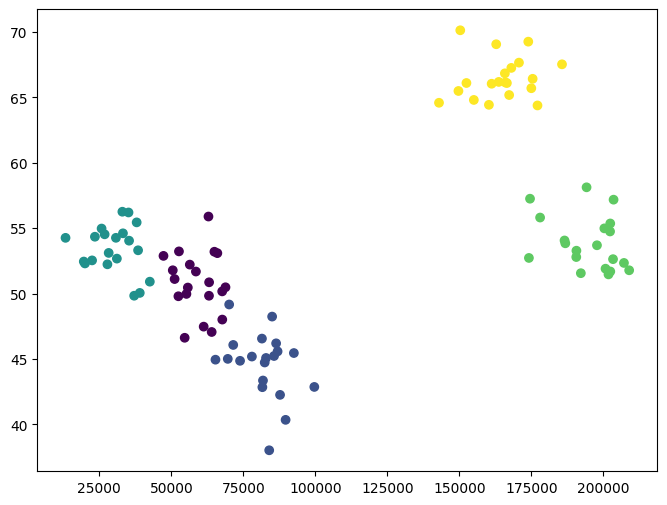

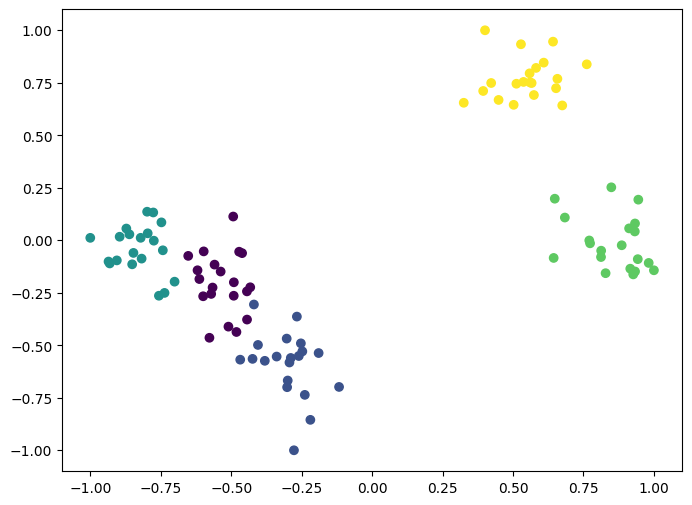

In [3]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5) # gerando 100 pontos em 5 clusters

# Plotando os dados gerados

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

In [4]:
from sklearn import svm, datasets

C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # Treina o modelo SVM com kernel linear

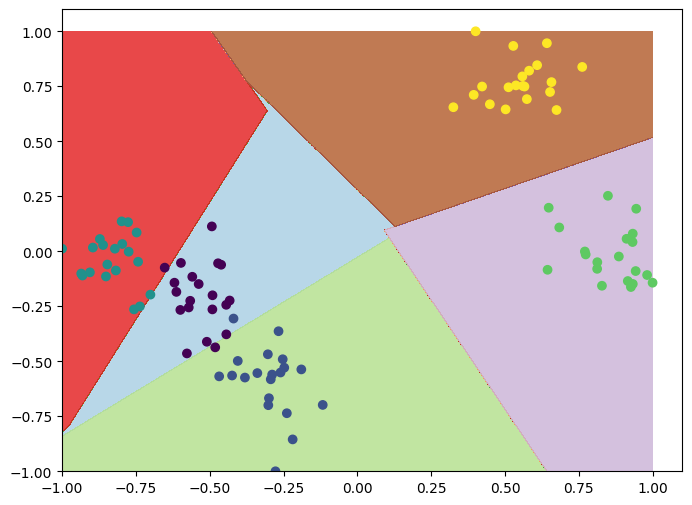

In [5]:
def plotPredictions(clf):
    # Cria uma grade densa de pontos para amostragem
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))

    # Converte para arrays Numpy
    npx = xx.ravel()
    npy = yy.ravel()

    # Converte para uma lista de pontos 2D (renda, idade)
    samplePoints = np.c_[npx, npy]

    # Gera rótulos previstos (números dos clusters) para cada ponto
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) # Redimensiona os resultados para corresponder à dimensão de xx
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Desenha o contorno
    plt.scatter(X[:,0], X[:,1], c=y.astype(float)) # Desenha os pontos
    plt.show()

plotPredictions(svc)

In [6]:
print(svc.predict(scaling.transform([[200000, 40]]))) # Previsão para renda 200000 e idade 40

[3]


In [7]:
print(svc.predict(scaling.transform([[50000, 65]]))) # Previsão para renda 50000 e idade 65

[2]


Utilizando outros kernels

In [8]:
C = 1.0 # Ajuste o parâmetro de regularização
svc = svm.SVC(kernel='poly', C=C).fit(X, y) # Treina o modelo SVM com kernel polinomial

Kernel Polinomial Modela os dados em um espaço de dimensão usando funções polinomiais.

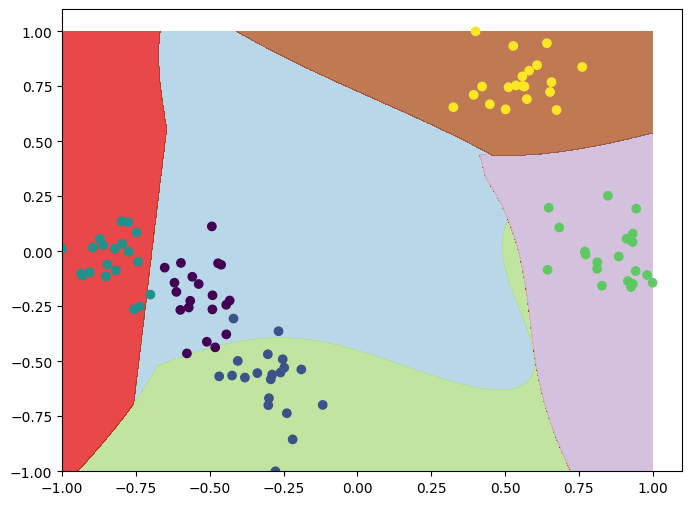

In [9]:
plotPredictions(svc)